# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have? 

Answer: 4

**b)** Why is it bad for a model to have too many degrees of freedom?

Answer: Too many degrees of freedom lead to overfitting. If one has more degrees of freedom than data points, then one can get a perfect fit for that data set, but the model will not work well on new data.

**c)** Why is it bad for a model to have too few degrees of freedom?

Answer: Too few degrees of freedom lead to underfitting. The model will not capture the complexity of the data.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7). What is the expression for the effective degrees of freedom of the ridge regression fit?

Answer:
 $$df(\lambda) = \sum^p_{j=1} \frac{d_j^2}{d_j^2+\lambda}$$

**e)** Why might we want to use Ridge regression instead of OLS?

Answer: Ridge regression adds a diagonal matrix of positive elements to the $\boldsymbol{X}^T\boldsymbol{X}$ matrix, ensuring that it is not singular and that it is invertible. Ridge regression can also reduce the effective degrees of freedom by increasing the hyperparameter $\lambda$. Ridge regression also places contstraints on the size of the fitting parameters, so we can avoid these blowing up as a result of correlation between variables.

**f)** Why migth we want to use OLS instead of Ridge regression?

Answer: OLS gives the smallest MSE when fitting a polynomial.

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

Answer:
We want to minimize this:
$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\} + \lambda \boldsymbol{\beta}^T\boldsymbol{\beta}.
$$
i.e. solve this for $\beta$ where we have dropped the factor $1/n$ in the cost function:
$$
\frac{\partial}{\partial \beta}\left[\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\} + \lambda \boldsymbol{\beta}^T\boldsymbol{\beta}\right] = \frac{\partial}{\partial \beta}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\} + \frac{\partial}{\partial \beta}\lambda \boldsymbol{\beta}^T\boldsymbol{\beta} =0
$$
we calculate the derivatives:
$$
  \frac{\partial}{\partial \beta}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\} = - 2(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T\boldsymbol{X}   
$$
and 
$$
    \frac{\partial}{\partial \beta}\lambda \boldsymbol{\beta}^T\boldsymbol{\beta} = 2\boldsymbol{\beta}^T
$$
We insert this, divide out factor $2$ and take the transpose on both sides of the equation (transpose of scalar 0 is 0) and find:
$$
    \boldsymbol{X}^T\boldsymbol{y} - (\boldsymbol{X}^T\boldsymbol{X}-\lambda\boldsymbol{I})\boldsymbol{\beta} = 0
$$
Solving for $\beta$, we then find that
$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

## Exercise 3 - Scaling data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [4]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        for i in range(p+1):
            X[:,i] = x**i
    else:
        X=np.zeros((n,p))
        for i in range(p):
            X[:,i] = x**(i+1)
    return X
    #X[:, 0] = ...
    #X[:, 1] = ...
    #X[:, 2] = ...
    # could this be a loop?

In [ ]:
#def polynomial_features(x, p, intercept=False):
#    n = len(x)
#    X = np.zeros((n, p))
#    X[:, 0] = x[:]
#    X[:, 1] = x**2
#    X[:, 2] = x**3
#    return X

**b)** Split your data into training and test data(80/20 split)

In [5]:
X = polynomial_features(x, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [ ]:
scaler = StandardScaler() # default initialized as: with_mean=True, with_std=True
scaler.fit(X_train)
X_train_s = scaler.transform(X_train) # perform centering and scaling
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [11]:
def Ridge_parameters(X, y,l):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X - l*np.identity(len(X[0,:]))) @ X.T @ y


**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

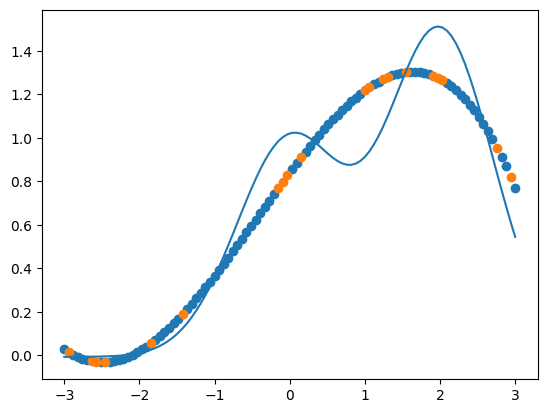

In [30]:
beta = Ridge_parameters(X_train_s, y_train,0.3)

plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

In [31]:
### a) ###
def MSE(X,y,beta): # define function for MSE
    n=len(y)
    vector = y-np.linalg.matmul(X,beta)
    return 1/n*np.inner(vector,vector)


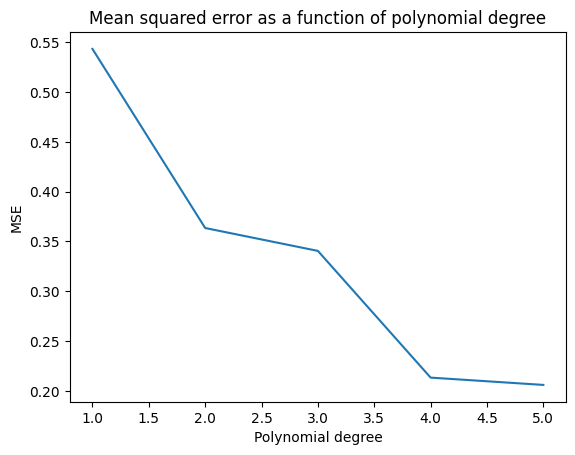

In [35]:
l = 0.01
poldegree = [1,2,3,4,5]
MSE_list = []
for pd in poldegree: # here we are not doing a training/test split
    X = polynomial_features(x, pd)
    beta = Ridge_parameters(X, y,l)
    MSE_list.append(MSE(X,y,beta))
plt.plot(poldegree,MSE_list)
plt.ylabel("MSE")
plt.xlabel("Polynomial degree")
plt.title("Mean squared error as a function of polynomial degree")
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Signe\AppData\Local\Temp\ipykernel_20448\1608729186.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$")
C:\Users\Signe\AppData\Local\Temp\ipykernel_20448\1608729186.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Mean squared error as a function of $\lambda$")


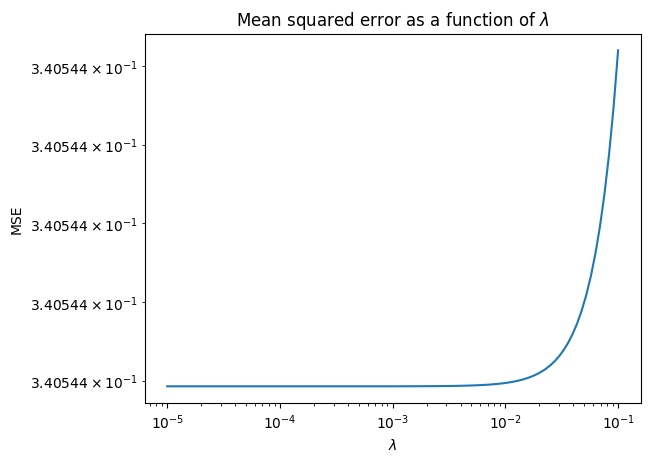

In [ ]:
### b) ####
n=10
lambda_list = np.logspace(-5,-1,num=n)
X = polynomial_features(x, 3)
MSE_list=[]
for l in lambda_list:
    beta = Ridge_parameters(X, y,l)
    MSE_list.append(MSE(X,y,beta))
plt.loglog(lambda_list,MSE_list)
plt.ylabel("MSE")
plt.xlabel("$\lambda$")
plt.title("Mean squared error as a function of $\lambda$")
plt.show()

In [57]:
### c) ####
n= 5
MSE_grid = np.zeros((5,n))
lambda_list = np.logspace(-5,-1,num=n)
poldegree = [1,2,3,4,5]

for i in range(len(poldegree)):
    for j in range(len(lambda_list)):
        X = polynomial_features(x, poldegree[i])
        beta = Ridge_parameters(X, y,lambda_list[j])
        MSE_grid[i,j] += MSE(X,y,beta)


<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Signe\AppData\Local\Temp\ipykernel_20448\2157465096.py:5: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$")


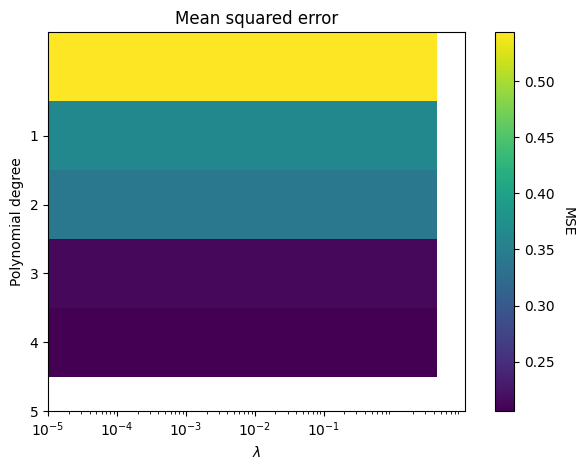

In [71]:
import matplotlib.colors as colors
fig, ax = plt.subplots()
im = ax.imshow(MSE_grid) # plot grid of MSEs
ax.set_title("Mean squared error")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Polynomial degree")
ax.set_xscale("log")
ax.set_xticks(lambda_list)
ax.set_yticks(poldegree)
fig.tight_layout()
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("MSE", rotation=-90, va="bottom")
plt.show()